<a href="https://colab.research.google.com/github/ojobo-tech/gisfordatascience/blob/main/ps1_ai_adoption_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

aok: very good topic--important and timely!

do focus on measurment, not just an index, but also individual vars that make it up; indices are often confusing eg infrastructure and adoption; yeah stuff like graduates in stem and then how ready is the country to adopt; responsivness to change

in general define AI--probably the measures you have are not measuring it well

# **GIS Project on AI Adoption in Governance Across the World**

**Presented by OJOBO AGBO EJE and SHAILESH REDDY DONTHI**

With the speedy advancement of Artificial Intelligence, and its proven ability to improve productivity and provide accelerated solutions across different sectors of the economy. Research shows that many countries are still behind in the adoption of AI. This could be as a result of many varying factors.

It is also known that the acceptance or adoption of new technology could be affected or influenced by policy made by government for or against the technology.

The goal of this project is to ascertain how ready a given government is to implement AI in the delivery of public service to their citizens.

Answering this question means measuring the multiple dimension of governmental and technological progress that contribute to AI readiness.

NB: This is an annual project carried out by the United Nations and Oxford Insights. A link to the full report: https://www.oxfordinsights.com/s/Government_AI_Readiness_2022_FV.pdf

aok: what is oxfordinsights? that a company has oxford in its name doesnt mean it makes sense; can you find data by other producers? do they differ

In [3]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [4]:
!pip install mapclassify
import mapclassify #need for thematic map classification

**Data Collection**

The main World Administrative Boundaries shapefile was collected from OpenDataSoft.com

The AI Readiness Index data was collected from OxfordInsights.com

The AI Indicators data was also collected from the UNIDO site

aok: ok good see if can get more

In [5]:
#Data showing the country boundaries was collected from Open Data Soft:

! wget -q -O world-administrative-boundaries.zip https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/world-administrative-boundaries/exports/shp?lang=en&timezone=America%2FNew_York
zip_ref = zipfile.ZipFile('world-administrative-boundaries.zip', 'r'); zip_ref.extractall(); zip_ref.close() #To Unzip
wd_map = gpd.read_file('world-administrative-boundaries.shp') #To load the shapefile with gpd as wd_map

<Axes: >

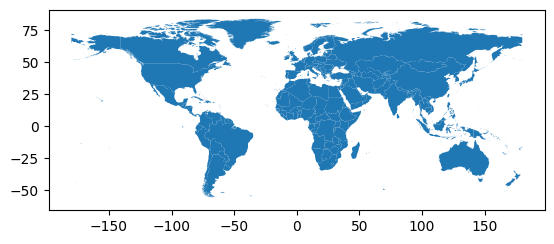

In [6]:
#General Map of the World
wd_map.plot()

**Data Exploration**

We want to explore the type of data for each of the variables from the world map.

In [7]:
wd_map.dtypes #with geopandas can do stuff like with pandas :)

iso3             object
status           object
color_code       object
name             object
continent        object
region           object
iso_3166_1_      object
french_shor      object
geometry       geometry
dtype: object

In [8]:
wd_map.head(2)

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
0,MNP,US Territory,USA,Northern Mariana Islands,Oceania,Micronesia,MP,Northern Mariana Islands,"MULTIPOLYGON (((145.63331 14.91236, 145.62412 ..."
1,NaN,Sovereignty unsettled,RUS,Kuril Islands,Asia,Eastern Asia,NaN,Kuril Islands,"MULTIPOLYGON (((146.68274 43.70777, 146.66664 ..."


In [9]:
#keep it simple!
wd_map=wd_map[['name','geometry']]

In [10]:
#Rename column, so it matches the data that will be merged
wd_map.rename(columns={'name': 'Country'}, inplace=True)

<ipython-input-10-3b5617d10832>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wd_map.rename(columns={'name': 'Country'}, inplace=True)


<Axes: >

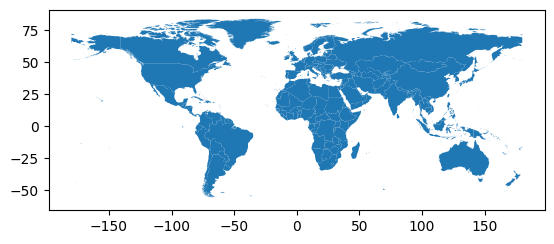

In [11]:
wd_map.plot() #World Map Based on Boundaries

In [12]:
len(wd_map)

256

In [13]:
countries_to_keep = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
                    'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
                    'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
                    'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
                    'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
                    'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
                    'Grenada', 'Guatemala', 'Guinea', 'Guinea Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
                    'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan',
                    'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali',
                    'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands',
                    'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay',
                    'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Republic of Korea', 'Republic of Moldova', 'Romania', 'Russian Federation',
                    'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
                    'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'South Africa', 'South Sudan', 'Spain', 'Sri Lanka',
                    'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga',
                    'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
                    'United Republic of Tanzania', 'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Viet Nam', 'Yemen', 'Zambia',
                    'Zimbabwe']
len(countries_to_keep)
wd_map = wd_map[wd_map['Country'].isin(countries_to_keep)]


179

# **Join/Merging**

**Data to be Merged**

To ascertain the readiness of governments, we will measure certain key indicators that influence AI adoption. To execute this, we got two datasets that we will match with the World Map.

Data_1 - AI Readiness Indicators: https://docs.google.com/uc?id=1DK5kz1eSB7IA24eGKro4gNH7DRyunCGo&export=download

Data_2 - Global AI Readiness Index: https://docs.google.com/uc?id=1cHhaREYsLU5AOtfV6tXYz0hBJ695ZZ2p&export=download

**Data_2 Exploration and Processing**

In [15]:
#Import Data_2 - Global AI Readiness Index

url = 'https://docs.google.com/uc?id=1cHhaREYsLU5AOtfV6tXYz0hBJ695ZZ2p&export=download'
global_ai_readinessindex = pd.read_csv(url, encoding='latin-1')

In [16]:
#Exploring the Data Types of the variables
global_ai_readinessindex.dtypes

Country                     object
AI_Index                   float64
Unnamed: 2                 float64
Government                 float64
Technology Sector          float64
Data and Infrastructure    float64
Unnamed: 6                 float64
Vision                       int64
Governance and Ethics      float64
Digital Capacity           float64
Adaptability               float64
Maturity                   float64
Innovation Capacity        float64
Human Capital              float64
Infrastructure             float64
Data Availability          float64
Data Representativeness    float64
dtype: object

In [17]:
global_ai_readinessindex

,Country,AI_Index,Unnamed: 2,Government,Technology Sector,Data and Infrastructure,Unnamed: 6,Vision,Governance and Ethics,Digital Capacity,Adaptability,Maturity,Innovation Capacity,Human Capital,Infrastructure,Data Availability,Data Representativeness
0,United States of America,85.72,NaN,86.21,81.67,89.28,NaN,100,89.22,82.74,72.87,84.74,93.02,67.27,88.34,80.01,99.50
1,Singapore,84.12,NaN,89.68,68.50,94.17,NaN,100,84.47,91.07,83.18,54.68,77.67,73.15,92.28,91.08,99.15
2,United Kingdom,78.54,NaN,81.81,65.57,88.24,NaN,100,88.07,74.17,64.99,52.67,76.61,67.43,84.14,83.91,96.68
3,Finland,77.59,NaN,87.80,58.71,86.27,NaN,100,89.19,84.33,77.69,41.50,71.73,62.89,87.95,81.91,88.96
4,Canada,77.39,NaN,84.11,64.41,83.65,NaN,100,86.97,78.69,70.77,51.72,76.84,64.67,83.37,77.53,90.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,South Sudan,19.45,NaN,14.45,16.90,27.02,NaN,0,21.34,14.02,22.42,4.26,22.27,24.16,11.31,14.02,55.73
177,Haiti,18.61,NaN,9.72,15.11,31.00,NaN,0,12.81,14.17,11.88,13.23,6.83,25.26,18.58,18.86,55.55
178,Yemen,17.32,NaN,18.39,22.05,11.53,NaN,0,26.20,34.46,12.90,6.67,24.03,35.44,5.57,24.31,4.71
179,Syrian Arab Republic,16.04,NaN,13.72,19.10,15.30,NaN,0,9.70,26.64,18.54,6.76,17.72,32.82,11.94,29.25,4.71


In [18]:
#Let us remove the unnecesary variables, leaving only the necessary variables
global_ai_readinessindex=global_ai_readinessindex[['Country','Data Representativeness','AI_Index']]

In [19]:
#Remove Empty Data aok: this removed USA!
global_ai_readinessindex=global_ai_readinessindex.iloc[1:, :]
global_ai_readinessindex

,Country,Data Representativeness,AI_Index
1,Singapore,99.15,84.12
2,United Kingdom,96.68,78.54
3,Finland,88.96,77.59
4,Canada,90.06,77.39
5,Republic of Korea,83.59,76.76
...,...,...,...
176,South Sudan,55.73,19.45
177,Haiti,55.55,18.61
178,Yemen,4.71,17.32
179,Syrian Arab Republic,4.71,16.04


In [20]:
#Exploring the first 5 Rows
global_ai_readinessindex.head(5)

,Country,Data Representativeness,AI_Index
1,Singapore,99.15,84.12
2,United Kingdom,96.68,78.54
3,Finland,88.96,77.59
4,Canada,90.06,77.39
5,Republic of Korea,83.59,76.76


In [21]:
countries_to_keep = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
                    'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
                    'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
                    'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
                    'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
                    'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
                    'Grenada', 'Guatemala', 'Guinea', 'Guinea Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
                    'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan',
                    'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali',
                    'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands',
                    'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay',
                    'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Republic of Korea', 'Republic of Moldova', 'Romania', 'Russian Federation',
                    'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
                    'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'South Africa', 'South Sudan', 'Spain', 'Sri Lanka',
                    'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga',
                    'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
                    'United Republic of Tanzania', 'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Viet Nam', 'Yemen', 'Zambia',
                    'Zimbabwe']

global_ai_readinessindex = global_ai_readinessindex[global_ai_readinessindex['Country'].isin(countries_to_keep)]


**1. AI Readiness Index**

We want to map AI Readiness across countries. That is, how ready is a country to adopt AI.

First we need to get the map with countries (wd_map), then the Data_2 on the Global AI Readiness Index and merge with countries data and finaly color code the polygons.




Merge Data Representativeness

In [22]:
# Merge using outer join
wd_map1 = pd.merge(wd_map, global_ai_readinessindex, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = wd_map1[['Country', 'AI_Index']]
print(result)

# Merge using inner join to keep exact matches
wd_map5 = pd.merge(wd_map, global_ai_readinessindex, on='Country', how='inner', indicator=False)


                    Country  AI_Index
0                    France     75.78
1                    Serbia     52.96
2                   Uruguay     58.25
3                    Panama     41.49
4                   Algeria     35.33
..                      ...       ...
174  Bosnia and Herzegovina     35.17
175              Cabo Verde     34.27
176                   Libya     28.84
177                Eswatini     25.46
178           Guinea Bissau     22.82

[179 rows x 2 columns]


In [23]:
wd_map1._merge.value_counts() #aok always investigate


both          167
right_only     11
left_only       1
Name: _merge, dtype: int64

In [24]:
wd_map1.Country[wd_map1._merge=='right_only']

168            United Kingdom
169                  Viet Nam
170           North Macedonia
171                      Iran
172       Republic of Moldova
173       Antigua and Barbuda
174    Bosnia and Herzegovina
175                Cabo Verde
176                     Libya
177                  Eswatini
178             Guinea Bissau
Name: Country, dtype: object

<Axes: >

[]

[]

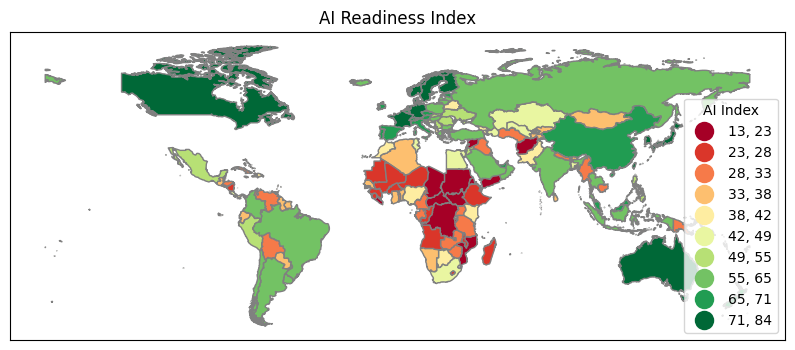

In [26]:
fig, ax = plt.subplots(1, figsize=(10,20))
wd_map5.plot(ax=ax,column='AI_Index',legend=True,cmap='RdYlGn',
          scheme='natural_breaks',k=10, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''AI Index''')
ax.title.set_text("AI Readiness Index")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: zillow.com/research/data''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

**Observation**

1. Countries in Africa have a very low AI readiness. (Which seems to be representative of their overall development)
2. Most of the countries in the Middle East that have been ravaged by war, have low AI readiness index.

aok: very good to interpret; can do maps of other stuff like development and war; and do scatterplots too. scroll down the class maps to see code for other visualizations

Data on poverty and wars https://www.rug.nl/ggdc/productivity/pwt/?lang=en

**2. Data Representativeness**

We want to map Data Representativeness across countries. That is, how much does their data actually represent the reality of the people in their country.

aok: this doesnt make any sense--how in the world is this measured?? what does it mean??

First need to get the map with countries (wd_map), then the Data_2 on the Global AI Readiness Index and merge with countries data and finaly color code the polygons.





Merge Data Representativeness

In [ ]:
# Merge using outer join
wd_map1 = pd.merge(wd_map, global_ai_readinessindex, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = wd_map1[['Country', 'Data Representativeness']]
print(result)

# Merge using inner join to keep exact matches
wd_map5 = pd.merge(wd_map, global_ai_readinessindex, on='Country', how='inner', indicator=False)


                      Country  Data Representativeness
0    Northern Mariana Islands                      NaN
1               Kuril Islands                      NaN
2                      France                    90.91
3                      Serbia                    75.08
4                     Uruguay                    84.02
..                        ...                      ...
262    Bosnia and Herzegovina                    73.32
263                Cabo Verde                    63.92
264                     Libya                    71.97
265                  Eswatini                    64.81
266             Guinea Bissau                    53.05

[267 rows x 2 columns]


<Axes: >

[]

[]

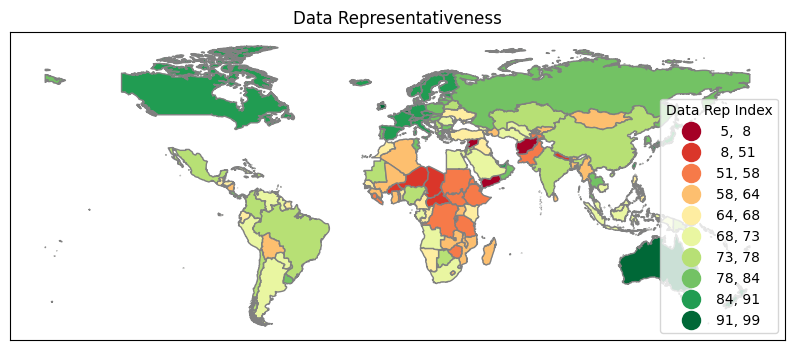

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,20))
wd_map5.plot(ax=ax,column='Data Representativeness',legend=True,cmap='RdYlGn',
          scheme='natural_breaks',k=10, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''Data Rep Index''')
ax.title.set_text("Data Representativeness")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: zillow.com/research/data''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

**Observation**

1. The countries with low AI index also have low Data representativeness.

**Data_1 Exploration and Processing**

In [27]:
#Import the Data_1: AI Readiness Indicators

url = 'https://docs.google.com/uc?id=1DK5kz1eSB7IA24eGKro4gNH7DRyunCGo&export=download'
ai_readiness_indicators = pd.read_csv(url, encoding='latin-1')

In [28]:
#Exploring the Data Types of the variables
ai_readiness_indicators.dtypes

Country                                                                    object
AI strategy                                                                 int64
Data protection and privacy laws                                            int64
Cybersecurity                                                             float64
Legal framework's adaptability to digital business models                 float64
Ethical principles                                                          int64
Accountability                                                            float64
Online services                                                           float64
Foundational IT infrastructure                                            float64
Government Promotion of Investment in Emerging Technologies               float64
Government Effectiveness                                                  float64
Government responsiveness to change                                       float64
Procurement Data

In [29]:
#Let us remove the unnecesary variables, leaving only the necessary variables
ai_readiness_indicators = ai_readiness_indicators[['Country','Graduates in STEM or computer science','Foundational IT infrastructure','Adoption of Emerging Technologies','AI research papers (log transformation)','Government responsiveness to change']]

In [30]:
#Exploring the first 5 Rows
ai_readiness_indicators.head(5)

,Country,Graduates in STEM or computer science,Foundational IT infrastructure,Adoption of Emerging Technologies,AI research papers (log transformation),Government responsiveness to change
0,Afghanistan,11.25,41.46,NaN,19.68,NaN
1,Albania,18.54,70.68,19.18,18.12,42.81
2,Algeria,30.13,49.33,47.15,54.07,48.18
3,Andorra,7.45,19.58,72.16,0.00,48.79
4,Angola,12.01,43.58,16.41,0.00,31.42


In [31]:
#Remove Empty Data
ai_readiness_indicators=ai_readiness_indicators.iloc[1:, :]
ai_readiness_indicators

,Country,Graduates in STEM or computer science,Foundational IT infrastructure,Adoption of Emerging Technologies,AI research papers (log transformation),Government responsiveness to change
1,Albania,18.54,70.68,19.18,18.12,42.81
2,Algeria,30.13,49.33,47.15,54.07,48.18
3,Andorra,7.45,19.58,72.16,0.00,48.79
4,Angola,12.01,43.58,16.41,0.00,31.42
5,Antigua and Barbuda,4.72,46.58,46.96,0.00,38.81
...,...,...,...,...,...,...
176,Venezuela,17.19,37.74,46.09,26.69,7.20
177,Viet Nam,22.68,80.40,50.09,61.18,49.40
178,Yemen,22.96,34.98,NaN,32.95,21.89
179,Zambia,18.64,65.31,25.44,11.11,39.47


In [32]:
countries_to_keep = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
                    'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
                    'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
                    'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
                    'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
                    'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
                    'Grenada', 'Guatemala', 'Guinea', 'Guinea Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
                    'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan',
                    'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali',
                    'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands',
                    'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay',
                    'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Republic of Korea', 'Republic of Moldova', 'Romania', 'Russian Federation',
                    'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
                    'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'South Africa', 'South Sudan', 'Spain', 'Sri Lanka',
                    'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga',
                    'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
                    'United Republic of Tanzania', 'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Viet Nam', 'Yemen', 'Zambia',
                    'Zimbabwe']

ai_readiness_indicators = ai_readiness_indicators[ai_readiness_indicators['Country'].isin(countries_to_keep)]


**3. Foundational IT infrastructure**

We want to map Foundational IT infrastructure across countries. How much infrastructure does the country have to support technological advancements.

First need to get the map with countries (wd_map), then the Data_1 on the AI Readiness Indicator and merge with countries data and finaly color code the polygons.




Merge Foundational IT infrastructure

In [33]:
# Merge using outer join
wd_map1 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = wd_map1[['Country', 'Foundational IT infrastructure']]
print(result)

# Merge using inner join to keep exact matches
wd_map3 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='inner', indicator=False)


                 Country  Foundational IT infrastructure
0                 France                           92.28
1                 Serbia                           80.22
2                Uruguay                           87.76
3                 Panama                           79.39
4                Algeria                           49.33
..                   ...                             ...
174                Libya                           15.61
175      North Macedonia                           58.31
176  Republic of Moldova                           74.24
177       United Kingdom                           67.50
178             Viet Nam                           80.40

[179 rows x 2 columns]


<Axes: >

[]

[]

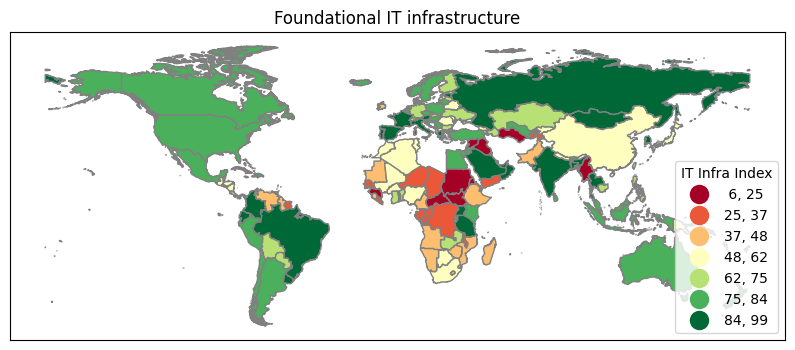

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,20))
wd_map3.plot(ax=ax,column='Foundational IT infrastructure',legend=True,cmap='RdYlGn',
          scheme='natural_breaks',k=7, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''IT Infra Index''')
ax.title.set_text("Foundational IT infrastructure")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: zillow.com/research/data''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

**Observation**

1. Countries in Africa have poor IT infrastructure which also reflects in their low government AI readiness.

2. Although countries like Brazil, Tanzania have good IT infrastructure, it doesn't totally translate to the government's AI readiness.

**4. Graduates in STEM or computer science**

We want to map Graduates in STEM or computer science across countries. Which is the percentage of people that graduate from STEM as compared to other programs.

First need to get the map with countries (wd_map), then the Data_1 on the AI Readiness Indicator and merge with countries data and finaly color code the polygons.




Merge Graduates in STEM or computer science

In [ ]:
# Merge using outer join
wd_map1 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = wd_map1[['Country', 'Graduates in STEM or computer science']]
print(result)

# Merge using inner join to keep exact matches
wd_map4 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='inner', indicator=False)


                      Country  Graduates in STEM or computer science
0    Northern Mariana Islands                                    NaN
1               Kuril Islands                                    NaN
2                      France                                  25.89
3                      Serbia                                  30.10
4                     Uruguay                                  15.24
..                        ...                                    ...
262                     Libya                                  28.42
263           North Macedonia                                  20.61
264       Republic of Moldova                                  25.01
265            United Kingdom                                  22.75
266                  Viet Nam                                  22.68

[267 rows x 2 columns]


<Axes: >

[]

[]

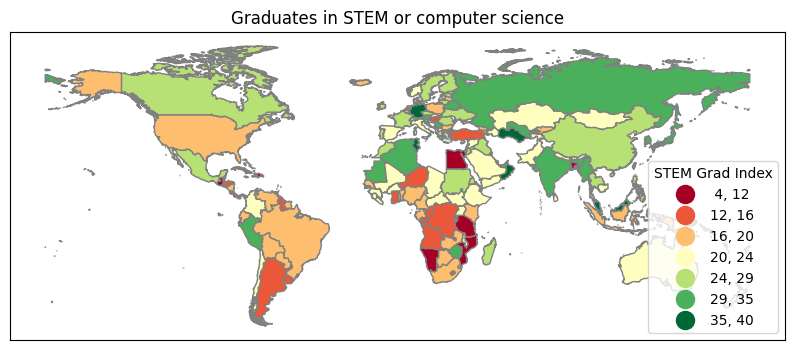

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,20))
wd_map4.plot(ax=ax,column='Graduates in STEM or computer science',legend=True,cmap='RdYlGn',
          scheme='natural_breaks',k=7, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''STEM Grad Index''')
ax.title.set_text("Graduates in STEM or computer science")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: zillow.com/research/data''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

**Observations**

1. Most African countries have low percentage of STEM graduates.

2. Although countries like Brazil and the US have low number of STEM graduates compared to other programs, they still have a comparably high AI readiness index.

**5. AI research papers**

We want to map percentage of AI research papers across countries.

First need to get the map with countries (wd_map), then the Data_1 on the AI Readiness Indicator and merge with countries data and finaly color code the polygons.




Merge AI research papers

In [ ]:
# Merge using outer join
wd_map1 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = wd_map1[['Country', 'AI research papers (log transformation)']]
print(result)

# Merge using inner join to keep exact matches
wd_map5 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='inner', indicator=False)


                      Country  AI research papers (log transformation)
0    Northern Mariana Islands                                      NaN
1               Kuril Islands                                      NaN
2                      France                                    72.38
3                      Serbia                                    45.28
4                     Uruguay                                    14.02
..                        ...                                      ...
262                     Libya                                    42.52
263           North Macedonia                                    23.28
264       Republic of Moldova                                    16.27
265            United Kingdom                                    80.09
266                  Viet Nam                                    61.18

[267 rows x 2 columns]


<Axes: >

[]

[]

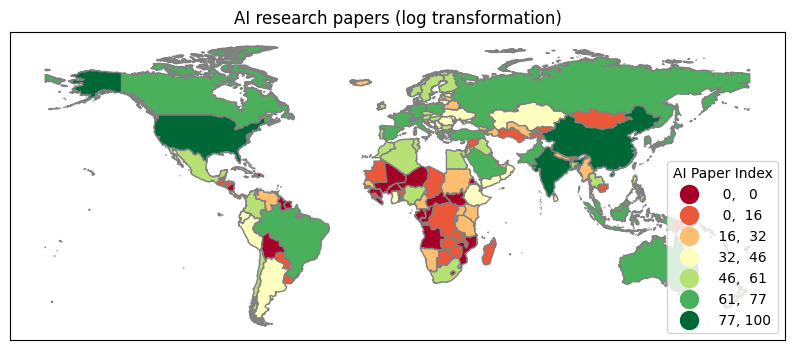

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,20))
wd_map5.plot(ax=ax,column='AI research papers (log transformation)',legend=True,cmap='RdYlGn',
          scheme='natural_breaks',k=7, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''AI Paper Index''')
ax.title.set_text("AI research papers (log transformation)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: zillow.com/research/data''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

aok: do per capita; why log transform?

**Observation**

1. Overall, regions with low AI readiness index have lower percentage of research papers in AI.

2. Although African countries like Nigeria, Algeria and South Africa have a considerable percentage of AI research papers, they still have a low AI readiness index.

**6. Government Responsivesness to Change**

We want to map Governments Responsivesness to Change across countries. How ready is a government willing to accept change in policy, tehnology etc.

First need to get the map with countries (wd_map), then the Data_1 on AI Readiness Indicators and merge with countries data and finaly color code the polygons.

aok: again how is that measured??? you ask govt if they are willing to accept change or what???


Merge Government's Responsiveness to Change

In [ ]:
# Merge using outer join
wd_map1 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = wd_map1[['Country', 'Government responsiveness to change']]
print(result)

# Merge using inner join to keep exact matches
wd_map6 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='inner', indicator=False)


                      Country  Government responsiveness to change
0    Northern Mariana Islands                                  NaN
1               Kuril Islands                                  NaN
2                      France                                55.99
3                      Serbia                                44.30
4                     Uruguay                                32.09
..                        ...                                  ...
262                     Libya                                42.70
263           North Macedonia                                31.84
264       Republic of Moldova                                35.21
265            United Kingdom                                58.37
266                  Viet Nam                                49.40

[267 rows x 2 columns]


<Axes: >

[]

[]

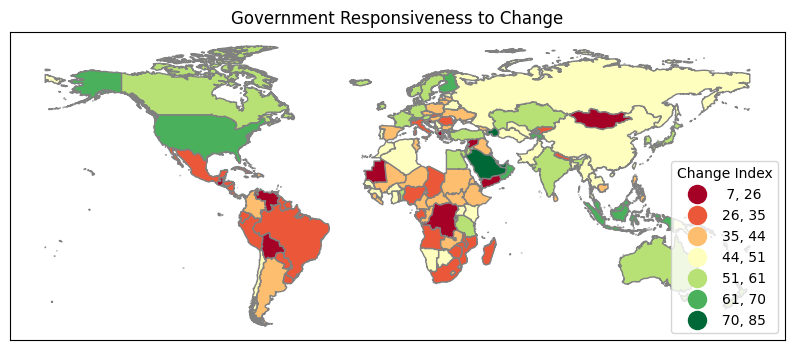

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,20))
wd_map6.plot(ax=ax,column='Government responsiveness to change',legend=True,cmap='RdYlGn',
          scheme='natural_breaks',k=7, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''Change Index''')
ax.title.set_text("Government Responsiveness to Change")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: zillow.com/research/data''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

SCATTERPLOT FOR VARIABLES

In [1]:
import plotly.express as px #a quick simple one
import plotly.graph_objects as go #can get convoluted
import numpy as np

In [38]:
px.scatter(ai_readiness_indicators, x='Graduates in STEM or computer science', y='Foundational IT infrastructure', color='Adoption of Emerging Technologies',
                  hover_data=['Country'],width=1000,height=600)

In [ ]:
df = px.data.gapminder().query("year == 2007")
px.treemap(df, path=[px.Constant("world"), 'continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))

In [ ]:
import seaborn as sns

<ipython-input-50-81171000fc5a>:1: FutureWarning: The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(wd_map1.corr().round(2),cmap="BrBG",annot=True) # RdYlGn love the colors!


<Axes: >

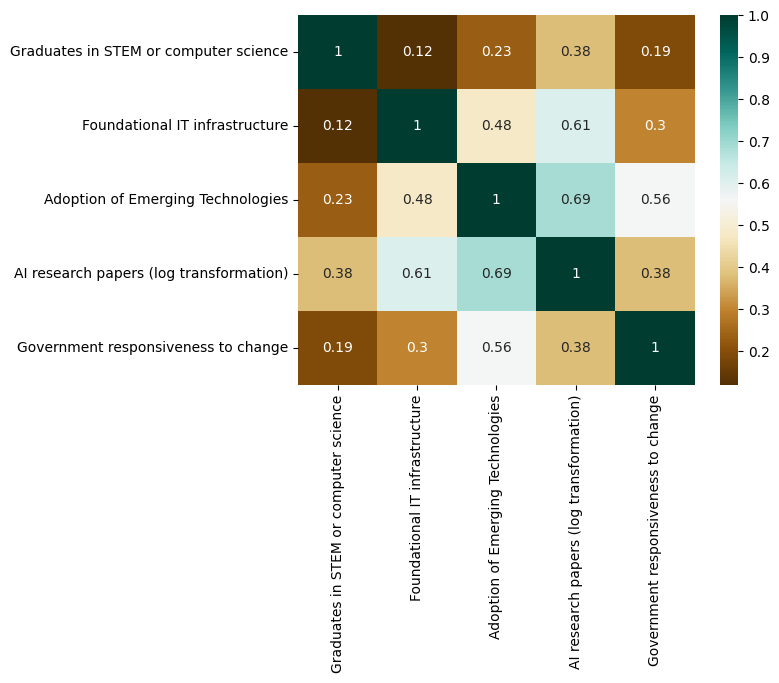

In [ ]:
sns.heatmap(wd_map1.corr().round(2),cmap="BrBG",annot=True) # RdYlGn love the colors!

**Observation**

1. Most countries where the government has low responsiveness to change also have a low AI readiness index.

2. Although countries like China, Russia, Brazil have a good AI readiness index, overall, they are not responsive to change. Which speaks to their responsiveness to AI adoption, but not overally policy or political change.

**Recommendations**

These recommendations are country and region specific which will be reflected in our implementation of our project initiative.

Governments should consider the following:

1. Adopt policies that push for accurate data collection.
2. Adopt AI into some public sector services (in phases)
3. Increase educational funding for STEM programs.
4. Launch initiatives to educate the general populace about the need for AI adoption.
5. Incentivize students going into STEM (scholarships, increased job certainty for STEM profesionals)
6. Invest massively in IT Infrastructures.
7. Fund AI research.
